In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

import plotly.graph_objects as go

mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

['NanumGothic']


In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

In [3]:
print('Pandas : %s'%(pd.__version__))
print('Numpy : %s'%(np.__version__))
print('Scikit-Learn : %s'%(sklearn.__version__))
!python --version

Pandas : 0.23.0
Numpy : 1.18.5
Scikit-Learn : 0.20.2
Python 3.5.2


In [4]:
dir_path = 'jeju_data/jeju_split/'
data = '201901' # 201901~202003 = 15개

dir_path2 = 'jeju_data/'
data2 = 'submission'

In [5]:
submission = pd.read_csv(dir_path2 + data2 + '.csv', index_col=0)
submission.shape

(1394, 4)

In [6]:
submission.head()

REG_YYMM CARD_SIDO_NM           STD_CLSS_NM  AMT
id                                                  
0     202004           강원            건강보조식품 소매업    0
1     202004           강원               골프장 운영업    0
2     202004           강원           과실 및 채소 소매업    0
3     202004           강원     관광 민예품 및 선물용품 소매업    0
4     202004           강원  그외 기타 분류안된 오락관련 서비스업    0

In [7]:
data_org= pd.read_csv(dir_path + data + '.csv')
data = data_org.copy()
data.shape

(1607032, 12)

In [8]:
data.head()

REG_YYMM CARD_SIDO_NM CARD_CCG_NM STD_CLSS_NM HOM_SIDO_NM HOM_CCG_NM  AGE  \
0    201901           강원         강릉시  건강보조식품 소매업          강원        강릉시  20s   
1    201901           강원         강릉시  건강보조식품 소매업          강원        강릉시  30s   
2    201901           강원         강릉시  건강보조식품 소매업          강원        강릉시  30s   
3    201901           강원         강릉시  건강보조식품 소매업          강원        강릉시  40s   
4    201901           강원         강릉시  건강보조식품 소매업          강원        강릉시  40s   

   SEX_CTGO_CD  FLC  CSTMR_CNT      AMT  CNT  
0            1    1          4   311200    4  
1            1    2          7  1374500    8  
2            2    2          6   818700    6  
3            1    3          4  1717000    5  
4            1    4          3  1047300    3

In [9]:
data=data.dropna(axis=1)

In [10]:
data.isna().sum()

REG_YYMM        0
CARD_SIDO_NM    0
STD_CLSS_NM     0
HOM_SIDO_NM     0
AGE             0
SEX_CTGO_CD     0
FLC             0
CSTMR_CNT       0
AMT             0
CNT             0
dtype: int64

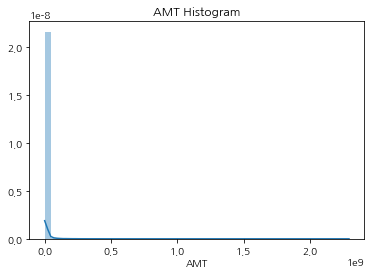

In [11]:
plt.title('AMT Histogram')
sns.distplot(data['AMT'])

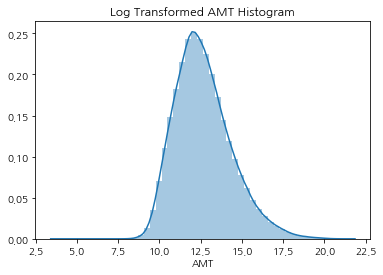

In [12]:
plt.title('Log Transformed AMT Histogram')
log_AMT = np.log1p(data['AMT'])
sns.distplot(log_AMT)

In [13]:
# SalePrice 로그 변환
original_AMT = data['AMT']
data['AMT'] = np.log1p(data['AMT'])

In [14]:
data.head()

REG_YYMM CARD_SIDO_NM STD_CLSS_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  \
0    201901           강원  건강보조식품 소매업          강원  20s            1    1   
1    201901           강원  건강보조식품 소매업          강원  30s            1    2   
2    201901           강원  건강보조식품 소매업          강원  30s            2    2   
3    201901           강원  건강보조식품 소매업          강원  40s            1    3   
4    201901           강원  건강보조식품 소매업          강원  40s            1    4   

   CSTMR_CNT        AMT  CNT  
0          4  12.648194    4  
1          7  14.133601    8  
2          6  13.615474    6  
3          4  14.356090    5  
4          3  13.861727    3

In [16]:
"""yes=0
no=0

A=data['CARD_SIDO_NM']
B=data['HOM_SIDO_NM']

for i in range(len(A)):
    if A[i] == B[i]:
        yes += 1
    else:
        no += 1

print(yes) # 동일한 갯수 ex) 201901 => 639,650
print(no) #동일하지 않는 개수 ex) 201901 => 967,382 즉, 다른 시도에서 온 사람이 쓴 횟수가 약 1.5배 더 많다.
# HOM_SIDO_NM도 중요한거 같다."""

639650
967382


In [15]:
# object 특성 원-핫 인코딩
print('get_dummies() 수행 전 데이터 Shape:', data.shape)
data_ohe = pd.get_dummies(data)
print('get_dummies() 수행 후 데이터 Shape:', data_ohe.shape)
# 남은 object 특성 갯수
null_column_count = data_ohe.isnull().sum()[data_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', data_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1607032, 10)
get_dummies() 수행 후 데이터 Shape: (1607032, 88)
## Null 피처의 Type :
 Series([], dtype: object)


In [18]:
data_ohe.head()

REG_YYMM  SEX_CTGO_CD  FLC  CSTMR_CNT        AMT  CNT  CARD_SIDO_NM_강원  \
0    201901            1    1          4  12.648194    4                1   
1    201901            1    2          7  14.133601    8                1   
2    201901            2    2          6  13.615474    6                1   
3    201901            1    3          4  14.356090    5                1   
4    201901            1    4          3  13.861727    3                1   

   CARD_SIDO_NM_경기  CARD_SIDO_NM_경남  CARD_SIDO_NM_경북   ...     HOM_SIDO_NM_제주  \
0                0                0                0   ...                  0   
1                0                0                0   ...                  0   
2                0                0                0   ...                  0   
3                0                0                0   ...                  0   
4                0                0                0   ...                  0   

   HOM_SIDO_NM_충남  HOM_SIDO_NM_충북  AGE_10s  AGE_20s  AGE_30s  AGE_40s  \
0               0               0        0        1        0        0   
1               0               0        0        0        1        0   
2               0               0        0        0        1        0   
3               0               0        0        0        0        1   
4               0               0        0        0        0        1   

   AGE_50s  AGE_60s  AGE_70s  
0        0        0        0  
1        0        0        0  
2        0        0        0  
3        0        0        0  
4        0        0        0  

[5 rows x 88 columns]

In [19]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = data_ohe['AMT']
X_features = data_ohe.drop('AMT',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 1.417
Ridge 로그 변환된 RMSE: 1.417
Lasso 로그 변환된 RMSE: 1.555


[1.417221458925401, 1.4172215055818107, 1.5551459014433464]

In [21]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

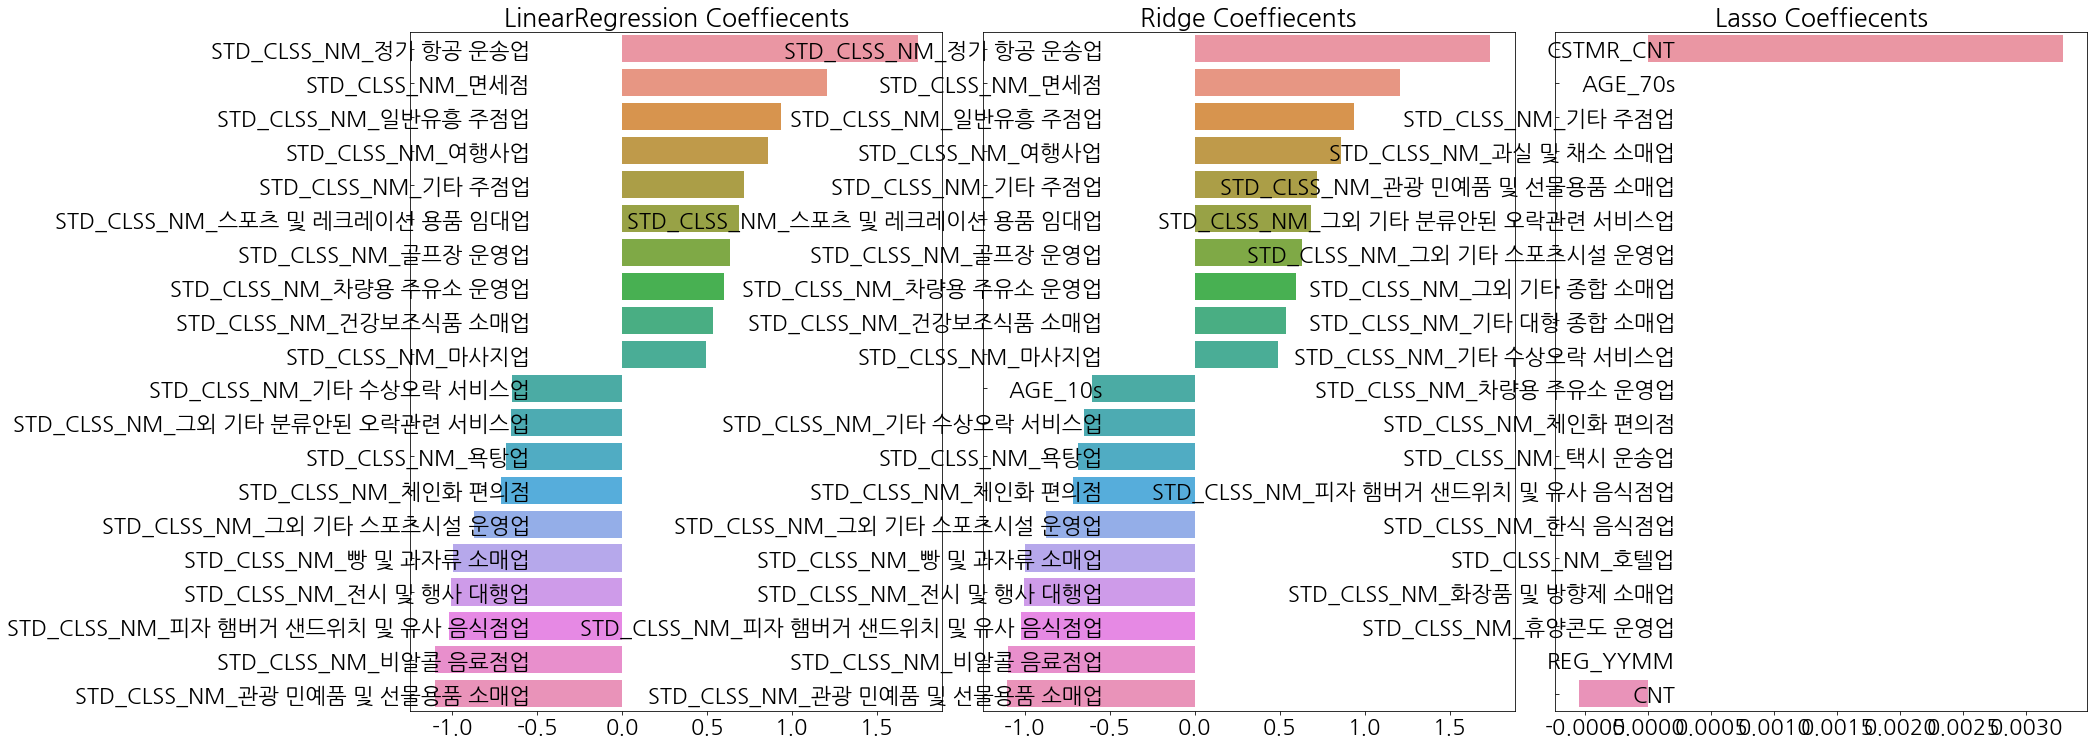

In [22]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [23]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [1.413 1.6   1.477 1.539 1.511]
LinearRegression CV 평균 RMSE 값: 1.508

Ridge CV RMSE 값 리스트: [1.413 1.6   1.477 1.539 1.511]
Ridge CV 평균 RMSE 값: 1.508

Lasso CV RMSE 값 리스트: [1.505 1.644 1.559 1.569 1.557]
Lasso CV 평균 RMSE 값: 1.567


In [24]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [31]:
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)
#시간오래걸림
#Ridge 5 CV 시 최적 평균 RMSE 값: 1.5092, 최적 alpha:{'alpha': 20}
#Lasso 5 CV 시 최적 평균 RMSE 값: 1.4826, 최적 alpha:{'alpha': 0.008}

Ridge 5 CV 시 최적 평균 RMSE 값: 1.5092, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 RMSE 값: 1.4826, 최적 alpha:{'alpha': 0.008}


LinearRegression 로그 변환된 RMSE: 1.417
Ridge 로그 변환된 RMSE: 1.417
Lasso 로그 변환된 RMSE: 1.452


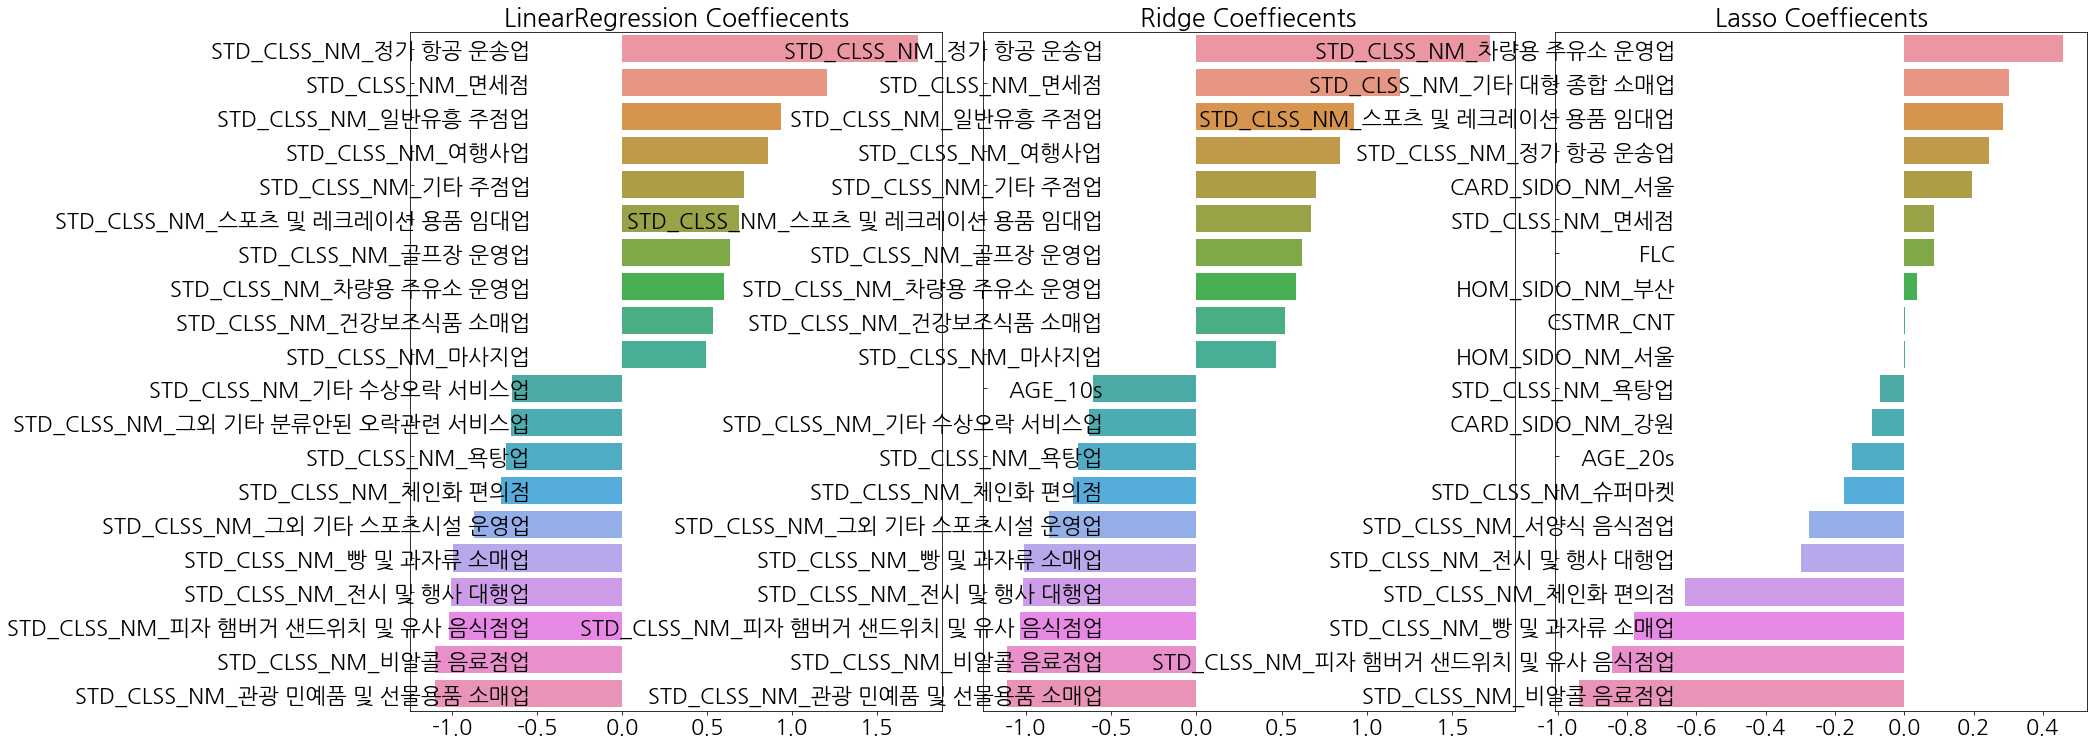

In [25]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.008)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [26]:
from scipy.stats import skew

# object가 아닌 숫자형 피쳐의 컬럼 index 객체 추출.
features_index = data.dtypes[data.dtypes != 'object'].index
# house_df에 컬럼 index를 [ ]로 입력하면 해당하는 컬럼 데이터 셋 반환. apply lambda로 skew( )호출 
skew_features = data[features_index].apply(lambda x : skew(x))
# skew 정도가 1 이상인 컬럼들만 추출. 
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

CNT          26.075834
CSTMR_CNT    20.154375
dtype: float64


In [27]:
# 추출된 왜곡 정도가 높은 피처를 로그 변환함
data[skew_features_top.index] = np.log1p(data[skew_features_top.index])

In [28]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
data_ohe = pd.get_dummies(data)
y_target = data_ohe['AMT']
X_features = data_ohe.drop('AMT',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [37]:
# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

#Ridge 5 CV 시 최적 평균 RMSE 값: 0.5943, 최적 alpha:{'alpha': 20}
#Lasso 5 CV 시 최적 평균 RMSE 값: 0.5942, 최적 alpha:{'alpha': 0.001}

Ridge 5 CV 시 최적 평균 RMSE 값: 0.5943, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.5942, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.574
Ridge 로그 변환된 RMSE: 0.574
Lasso 로그 변환된 RMSE: 0.579


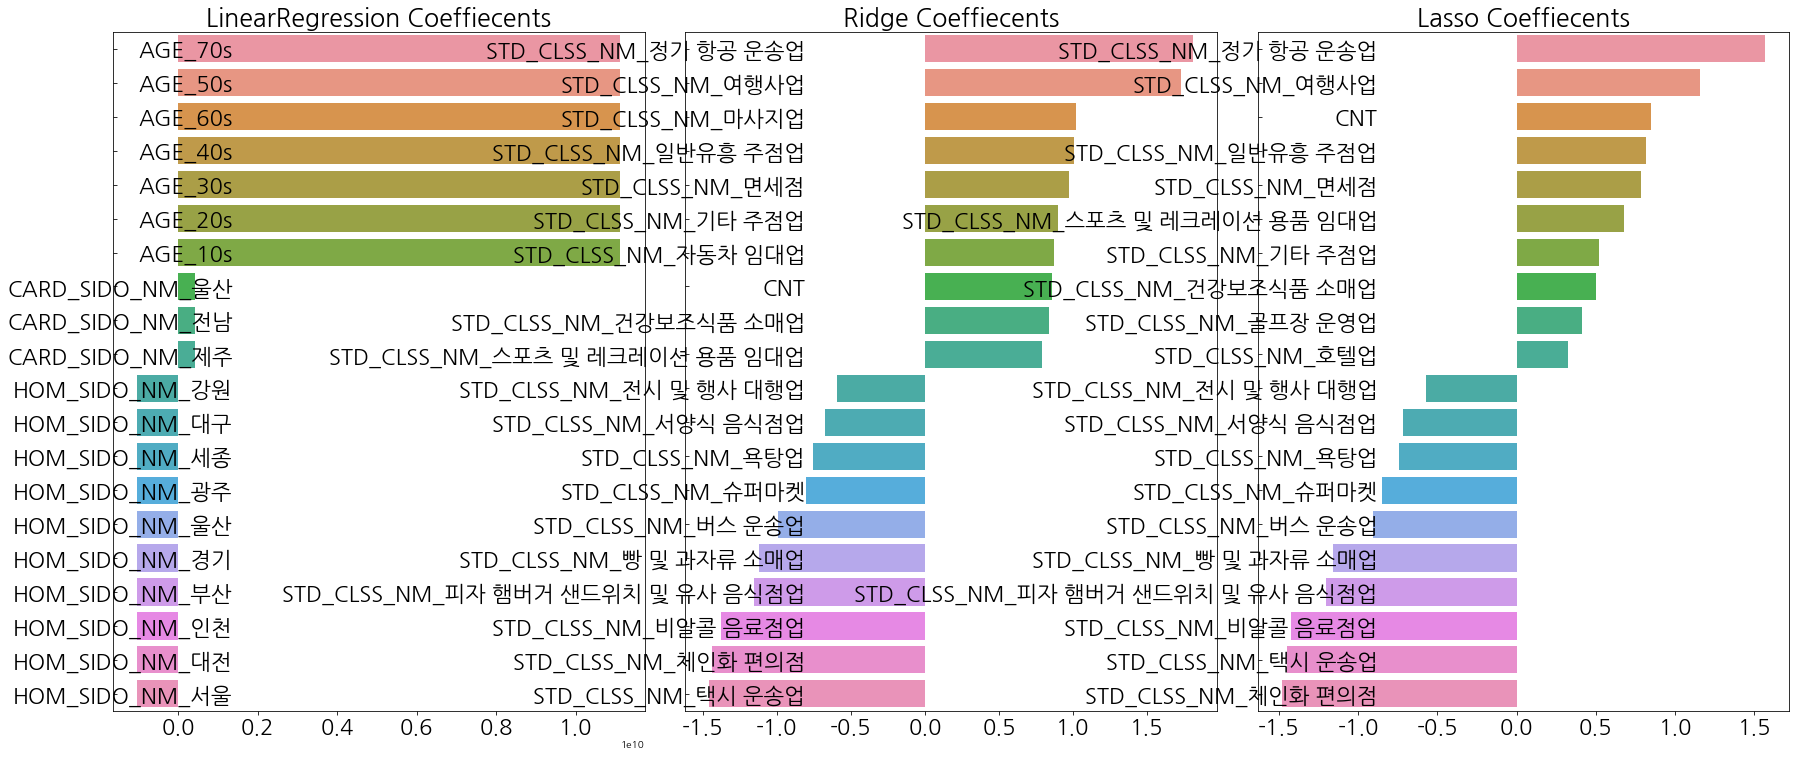

In [29]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [ ]:
plt.scatter(x = data_org['CNT'], y = data_org['AMT'])
plt.ylabel('AMT', fontsize=15)
plt.xlabel('CNT', fontsize=15)
plt.show()

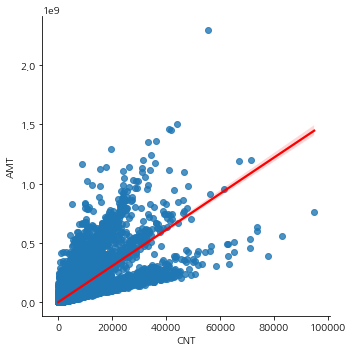

In [42]:
sns.lmplot(x="CNT", y="AMT", data=data_org, line_kws={'color':"red"})

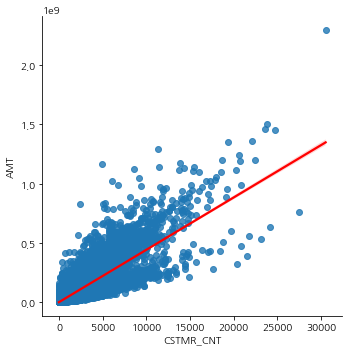

In [44]:
sns.lmplot(x="CSTMR_CNT", y="AMT", data=data_org, line_kws={'color':"red"})

In [52]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성. 
cond1 = data_ohe['CNT'] > np.log1p(50000)
cond2 = data_ohe['AMT'] > np.log1p(2000000000)
outlier_index = data_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 data_ohe shape:', data_ohe.shape)
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제. 
data_ohe.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 data_ohe shape:', data_ohe.shape)

아웃라이어 레코드 index : []
아웃라이어 삭제 전 data_ohe shape: (1607031, 88)
아웃라이어 삭제 후 data_ohe shape: (1607031, 88)


In [54]:
# 이상치가 제거된 데이터 세트를 기반으로 다시 분할된 데이터 세트의 최적 alpha 구하기
y_target = data_ohe['AMT']
X_features = data_ohe.drop('AMT',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)
#Ridge 5 CV 시 최적 평균 RMSE 값: 1.2942, 최적 alpha:{'alpha': 20}
#Lasso 5 CV 시 최적 평균 RMSE 값: 1.2962, 최적 alpha:{'alpha': 0.001}

Ridge 5 CV 시 최적 평균 RMSE 값: 0.5943, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.5942, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.574
Ridge 로그 변환된 RMSE: 0.574
Lasso 로그 변환된 RMSE: 0.579


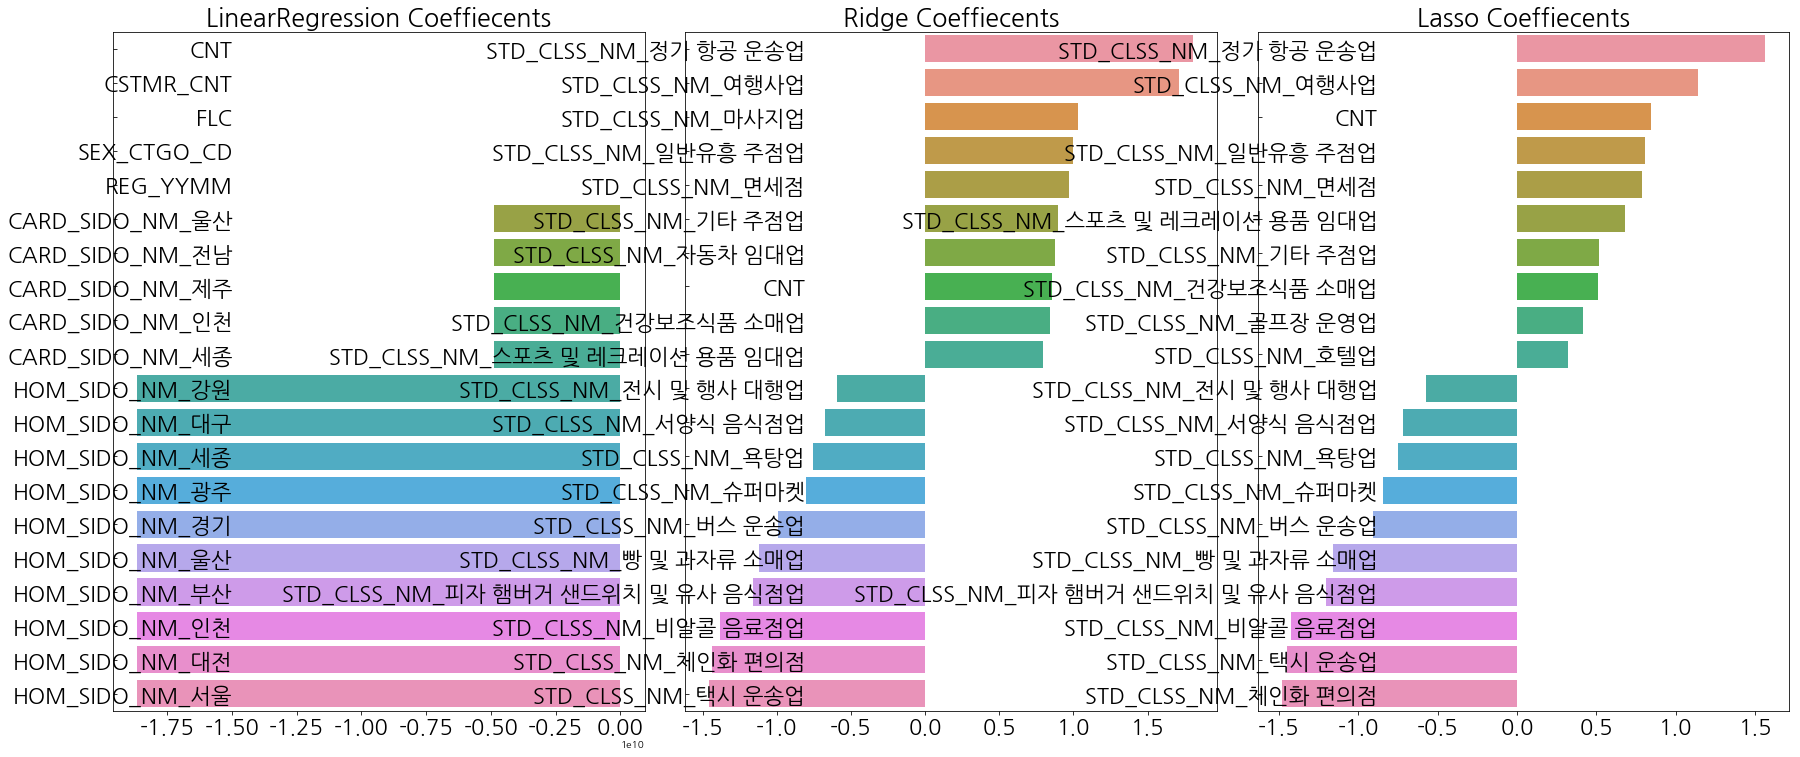

In [55]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [56]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

KeyboardInterrupt: 

In [ ]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

TypeError: 'XGBRegressor' object is not iterable

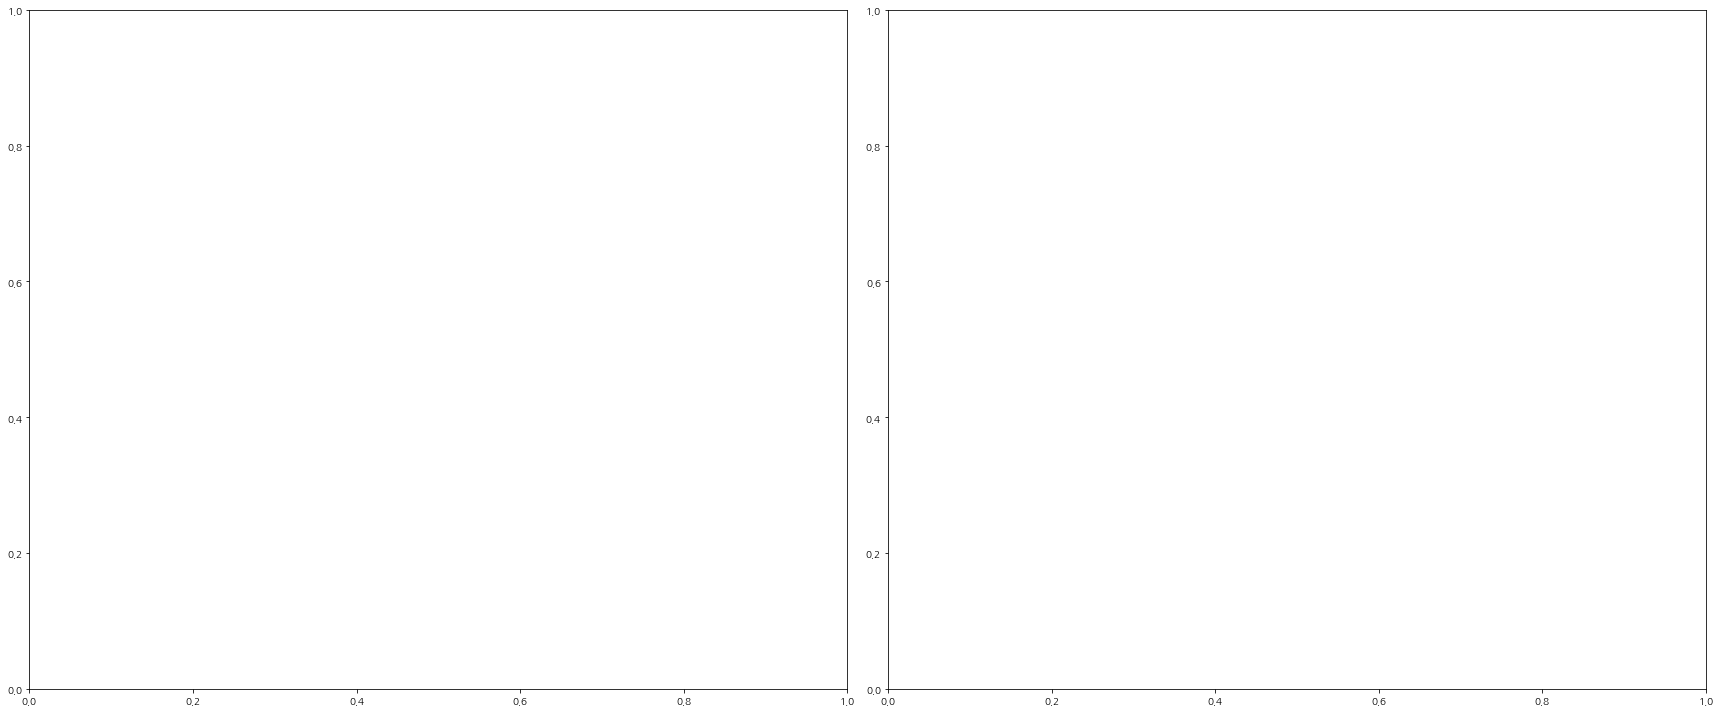

In [42]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

In [ ]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

In [ ]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [ ]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

In [ ]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

In [ ]:
#------------------------------------------------------------------------------------------------------------#

In [6]:
def vcount(v):
    # 변수 분포와 갯수알아보기. Ex) vcount('CARD_SIDO_NM')
    fig = go.Figure([go.Bar(x=data[v].unique(), y=data[v].value_counts())])
    fig.show()
    dict = {v:data[v].unique(), 'num':data[v].value_counts()}
    df_dict = pd.DataFrame(dict).reset_index()
    df_dict.rename(columns={'index':v, 0:'num'})
    df_dict = df_dict.drop(['index'], axis=1)
    print(df_dict)

In [9]:
# 시도명
vcount('CARD_SIDO_NM')

   CARD_SIDO_NM      num
0            강원  6259502
1            경기  5188230
2            경남  2030810
3            경북  1278410
4            광주  1230355
5            대구  1222818
6            대전  1204831
7            부산  1178159
8            서울   834707
9            세종   829466
10           울산   819291
11           인천   758424
12           전남   523121
13           전북   497503
14           제주   432150
15           충남   322802
16           충북    87213


In [16]:
# 인코딩
dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
        
df_num = df.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])

In [ ]:
dtypes

CARD_SIDO_NM    object
STD_CLSS_NM     object
HOM_SIDO_NM     object
AGE             object
SEX_CTGO_CD      int64
FLC              int64
year             int64
month            int64
CSTMR_CNT        int64
AMT              int64
CNT              int64
dtype: object

In [ ]:
# feature, target 설정
train_num = df_num.sample(frac=1, random_state=0)
x = train_num.drop(['CSTMR_CNT', 'AMT', 'CNT'], axis=1)
y = np.log1p(train_num['AMT'])

In [ ]:
k = int(len(x)*0.8) # 0.9 -> 0.8 고침

In [ ]:
x_train = x[:k]
y_train = y[:k]
x_val = x[k:]
y_val = y[k:]

In [ ]:
import lightgbm as lgb

In [ ]:
train_ds = lgb.Dataset(x_train, label=y_train)
val_ds = lgb.Dataset(x_val, label=y_val)

In [ ]:
params = {
            'learning_rate' : 0.01, #0.05 -> 0.01로 바꿈
            'boosting_type': 'gbdt',
            'objective': 'tweedie',
            'tweedie_variance_power': 1.1,
            'metric': 'rmse',
            'sub_row' : 0.75,
            'lambda_l2' : 0.1
        }

In [ ]:
model = lgb.train(params,
                  train_ds,
                  1000,
                  val_ds,
                  verbose_eval = 100,
                  early_stopping_rounds = 100
                 )

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 2.32214
[200]	valid_0's rmse: 2.20125
[300]	valid_0's rmse: 2.11218
[400]	valid_0's rmse: 2.03998
[500]	valid_0's rmse: 1.98619
[600]	valid_0's rmse: 1.94442
[700]	valid_0's rmse: 1.90574
[800]	valid_0's rmse: 1.87226
[900]	valid_0's rmse: 1.84365


In [ ]:
# 예측 템플릿 만들기
CARD_SIDO_NMs = df_num['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = df_num['STD_CLSS_NM'].unique()
HOM_SIDO_NMs  = df_num['HOM_SIDO_NM'].unique()
AGEs          = df_num['AGE'].unique()
SEX_CTGO_CDs  = df_num['SEX_CTGO_CD'].unique()
FLCs          = df_num['FLC'].unique()
years         = [2020]
months        = [4, 7]

temp = []
for CARD_SIDO_NM in CARD_SIDO_NMs:
    for STD_CLSS_NM in STD_CLSS_NMs:
        for HOM_SIDO_NM in HOM_SIDO_NMs:
            for AGE in AGEs:
                for SEX_CTGO_CD in SEX_CTGO_CDs:
                    for FLC in FLCs:
                        for year in years:
                            for month in months:
                                temp.append([CARD_SIDO_NM, STD_CLSS_NM, HOM_SIDO_NM, AGE, SEX_CTGO_CD, FLC, year, month])
temp = np.array(temp)
temp = pd.DataFrame(data=temp, columns=x.columns)

In [ ]:
# 예측
pred = model.predict(temp)
pred = np.expm1(pred)
temp['AMT'] = np.round(pred, 0)
temp['REG_YYMM'] = temp['year']*100 + temp['month']
temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp = temp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)


In [ ]:
plt.scatter(X,y)
plt.plot(X, pred)

In [191]:
# 디코딩 
temp['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(temp['CARD_SIDO_NM'])
temp['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(temp['STD_CLSS_NM'])

In [192]:
# 제출 파일 만들기

submission = submission.drop(['AMT'], axis=1)
submission = submission.merge(temp, left_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission.index.name = 'id'
submission.to_csv('submission4.csv', encoding='utf-8-sig')
submission.head()

REG_YYMM CARD_SIDO_NM           STD_CLSS_NM           AMT
id                                                           
0     202004           강원            건강보조식품 소매업  5.929828e+08
1     202004           강원               골프장 운영업  1.277057e+09
2     202004           강원           과실 및 채소 소매업  6.241527e+08
3     202004           강원     관광 민예품 및 선물용품 소매업  1.663867e+08
4     202004           강원  그외 기타 분류안된 오락관련 서비스업  1.565668e+08